Mean Squared Error: 53.19392805133768


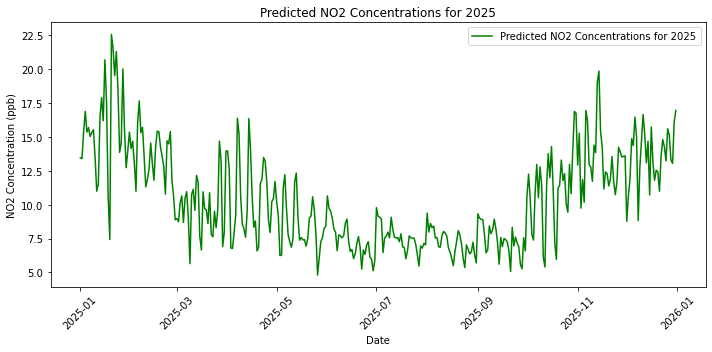

In [1]:
#RANDOM FOREST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load data from multiple CSV files
files = ['NO 2022.csv', 'NO 2023.csv', 'NO 2024.csv']
data_frames = [pd.read_csv(file) for file in files]

# Combine data into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Step 2: Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Step 3: Select relevant features and target
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Site Latitude', 'Site Longitude']
target = 'Daily Max 1-hour NO2 Concentration'

# Prepare the training data using the last 3 years (2022, 2023, 2024)
train_data = data[data['Year'].isin([2022, 2023, 2024])]
X = train_data[features]
y = train_data[target]

# Step 4: Train/test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Train the model
model.fit(X_train, y_train)

# (Optional) Evaluate the model on the test set
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 7: Create future data for 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31')
future_data = pd.DataFrame({
    'Date': future_dates,
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'DayOfWeek': future_dates.dayofweek,
    'Site Latitude': [data['Site Latitude'].mean()] * len(future_dates),  # Replace with actual lat/long
    'Site Longitude': [data['Site Longitude'].mean()] * len(future_dates)   # Replace with actual lat/long
})

# Step 8: Make predictions for 2025
future_predictions = model.predict(future_data[features])

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_predictions, label='Predicted NO2 Concentrations for 2025', color='green')
plt.xlabel('Date')
plt.ylabel('NO2 Concentration (ppb)')
plt.title('Predicted NO2 Concentrations for 2025')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Absolute Error: 10.177499398106617
R² Score: 0.013551547641567963


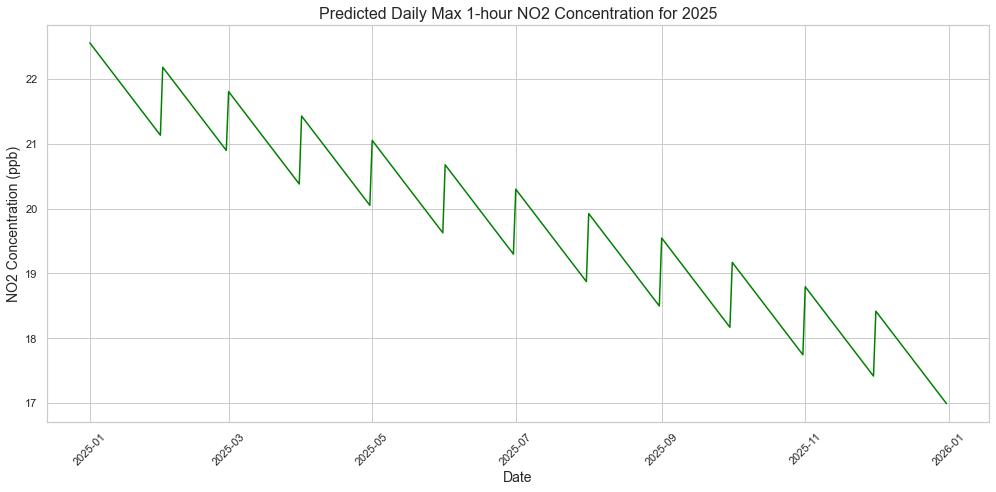

In [2]:
#STANDARD SCALER
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the three CSV files
data_2022 = pd.read_csv('NO 2022.csv')
data_2023 = pd.read_csv('NO 2023.csv')
data_2024 = pd.read_csv('NO 2024.csv')

# Combine the data into a single DataFrame
data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Use relevant features
features = ['Year', 'Month', 'Day', 'Daily Obs Count', 'Percent Complete']
X = data[features]
y = data['Daily Max 1-hour NO2 Concentration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Predict for 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Daily Obs Count': np.mean(data['Daily Obs Count']),  # Using mean as an example
    'Percent Complete': np.mean(data['Percent Complete'])   # Using mean as an example
})

# Scale future data
future_data_scaled = scaler.transform(future_data[features])

# Predict future NO2 concentrations
future_predictions = model.predict(future_data_scaled)

# Add predictions to future_data DataFrame
future_data['Predicted Daily Max 1-hour NO2 Concentration'] = future_predictions

# Convert 'Year', 'Month', and 'Day' into a single datetime column for plotting
future_data['Date'] = pd.to_datetime(future_data[['Year', 'Month', 'Day']])

# Set the style of Seaborn
sns.set(style='whitegrid')

# Create a line plot for the predicted values
plt.figure(figsize=(14, 7))
sns.lineplot(data=future_data, x='Date', y='Predicted Daily Max 1-hour NO2 Concentration', color='green')

# Add titles and labels
plt.title('Predicted Daily Max 1-hour NO2 Concentration for 2025', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('NO2 Concentration (ppb)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Mean Absolute Error: 9.75259391097857
R² Score: 0.0992904284930124


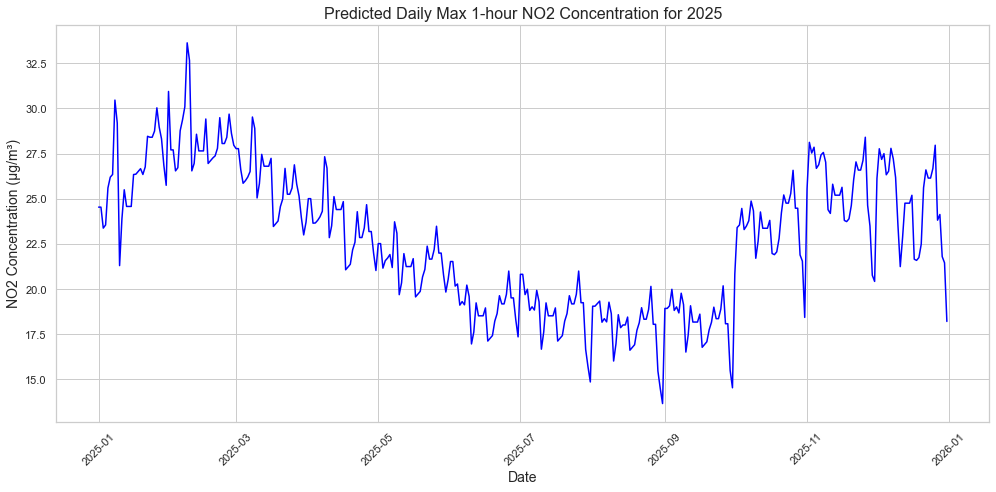

In [3]:
#XGBOOST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the three CSV files
data_2022 = pd.read_csv('NO 2022.csv')
data_2023 = pd.read_csv('NO 2023.csv')
data_2024 = pd.read_csv('NO 2024.csv')

# Combine the data into a single DataFrame
data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Use relevant features
features = ['Year', 'Month', 'Day', 'Daily Obs Count', 'Percent Complete']
X = data[features]
y = data['Daily Max 1-hour NO2 Concentration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Predict for 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Daily Obs Count': np.mean(data['Daily Obs Count']),  # Using mean as an example
    'Percent Complete': np.mean(data['Percent Complete'])   # Using mean as an example
})

# Scale future data
future_data_scaled = scaler.transform(future_data[features])

# Predict future NO2 concentrations
future_predictions = model.predict(future_data_scaled)

# Add predictions to future_data DataFrame
future_data['Predicted Daily Max 1-hour NO2 Concentration'] = future_predictions

# Convert 'Year', 'Month', and 'Day' into a single datetime column for plotting
future_data['Date'] = pd.to_datetime(future_data[['Year', 'Month', 'Day']])

# Set the style of Seaborn
sns.set(style='whitegrid')

# Create a line plot for the predicted values
plt.figure(figsize=(14, 7))
sns.lineplot(data=future_data, x='Date', y='Predicted Daily Max 1-hour NO2 Concentration', color='blue')

# Add titles and labels
plt.title('Predicted Daily Max 1-hour NO2 Concentration for 2025', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('NO2 Concentration (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 9.979577198755813
R² Score: 0.02326873011285835


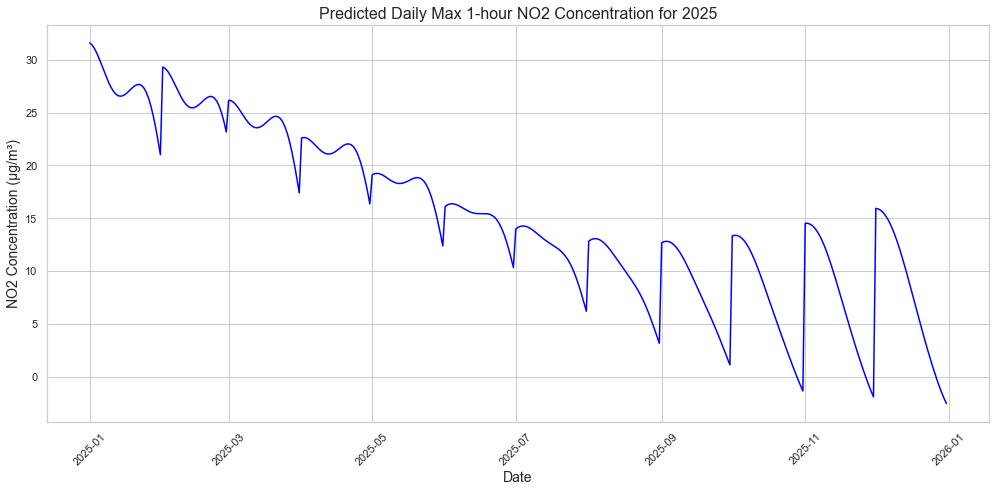

In [4]:
#SUPPORT VECTOR REGRESSION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the three CSV files
data_2022 = pd.read_csv('NO 2022.csv')
data_2023 = pd.read_csv('NO 2023.csv')
data_2024 = pd.read_csv('NO 2024.csv')

# Combine the data into a single DataFrame
data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Use relevant features
features = ['Year', 'Month', 'Day', 'Daily Obs Count', 'Percent Complete']
X = data[features]
y = data['Daily Max 1-hour NO2 Concentration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Support Vector Regression model
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)  # You can tune the parameters like C, gamma, and epsilon
svr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_test = svr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

# Predict for 2025
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Daily Obs Count': np.mean(data['Daily Obs Count']),  # Using mean as an example
    'Percent Complete': np.mean(data['Percent Complete'])   # Using mean as an example
})

# Scale future data
future_data_scaled = scaler.transform(future_data[features])

# Predict future NO2 concentrations
future_predictions = svr_model.predict(future_data_scaled)

# Add predictions to future_data DataFrame
future_data['Predicted Daily Max 1-hour NO2 Concentration'] = future_predictions

# Convert 'Year', 'Month', and 'Day' into a single datetime column for plotting
future_data['Date'] = pd.to_datetime(future_data[['Year', 'Month', 'Day']])

# Set the style of Seaborn
sns.set(style='whitegrid')

# Create a line plot for the predicted values
plt.figure(figsize=(14, 7))
sns.lineplot(data=future_data, x='Date', y='Predicted Daily Max 1-hour NO2 Concentration', color='blue')

# Add titles and labels
plt.title('Predicted Daily Max 1-hour NO2 Concentration for 2025', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('NO2 Concentration (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()